In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('online_adapt.csv')

# Encode `Age` to integers, 1, 2, 3, 4, 5, 6.
age_mapper = {'26-30':6, '21-25':5, '16-20':4, '11-15':3, '6-10':2, '1-5':1}
age_t = data['Age'].replace(age_mapper)

# Encode `Network Type` to integers, 2, 3, 4.
net_mapper = {'2G':2, '3G':3, '4G':4}
net_t = data['Network Type'].replace(net_mapper)

# Encode `Class Duration` to integers, 0, 1, 2.
class_mapper = {'0':0, '1-3':1, '3-6':2}
class_t = data['Class Duration'].replace(class_mapper)

# Replace `Age`, `Network Type`, `Class Duration` by their corresponding numeric versions.
data['Age'] = age_t
data['Network Type'] = net_t
data['Class Duration'] = class_t

In [2]:
# One-hot encode the rest of the variables except for the response variable, `Adaptivity Level`.

y = data['Adaptivity Level']
data1 = pd.get_dummies(data.drop('Adaptivity Level', axis=1))
data1.head(2)

,Age,Network Type,Class Duration,Gender_Boy,Gender_Girl,Education Level_College,Education Level_School,Education Level_University,Institution Type_Government,Institution Type_Non Government,...,Financial Condition_Mid,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Mobile Data,Internet Type_Wifi,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,5,4,2,1,0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
1,5,4,1,0,1,0,0,1,0,1,...,1,0,0,1,0,0,1,0,1,0


In [3]:
data1.shape

(1205, 26)

In [4]:
# Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

# Create standardizer
standardizer = StandardScaler()

# Standardize features
feature_std = standardizer.fit_transform(data1)

# spliting
X_train, X_test, y_train, y_test = train_test_split(feature_std, y, test_size=0.25, random_state=100, stratify=y)

# Create a scaler
normalizer = Normalizer()

# Scale features
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.fit_transform(X_test)

# Fit the scaler
X_train_sc = standardizer.fit_transform(X_train_norm)
X_test_sc = standardizer.fit_transform(X_test_norm)

# Train a KNN classifier with 5 neighbors
knn5 = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn5.fit(feature_std,y) 

# Create a pipeline
pipe = Pipeline([("standardizer", standardizer), ("knn", knn5)])

# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# Create grid search
classifier = GridSearchCV(
    pipe, search_space, cv=5, verbose=0).fit(X_train_sc, y_train)

print("Test set accuracy: {:.2f}".format(knn5.score(X_test_sc,y_test)))

Test set accuracy: 0.91


In [5]:
print("Test set accuracy: {:.2f}".format(knn5.score(X_train_sc, y_train)))

Test set accuracy: 0.89


In [6]:
# Load libraries
from sklearn.neighbors import RadiusNeighborsClassifier

# Split data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.25,
                                                    random_state=100,stratify=y)

# Create a scaler
normalizer = Normalizer()

# Standardize features
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.fit_transform(X_test)


In [19]:
# Define a RNN classifier
rnn = RadiusNeighborsClassifier(outlier_label='most_frequent') 

# Create a pipeline
pipe = Pipeline([("normalizer", normalizer), ("rnn", rnn)])

# Create space of candidate values
SearchSpace=[{'rnn__radius': np.arange(0.01, 2, .5) }]
# There are two '_' after 'rnn'

# Create grid search
classifier = GridSearchCV(
    pipe, SearchSpace, cv=10, verbose=0).fit(X_train, y_train)


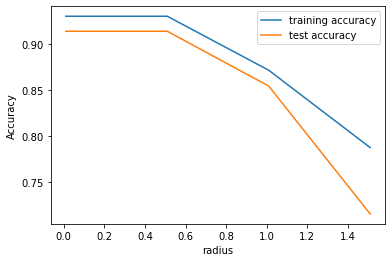

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline


# try radius from 0.01 to 2
radius = np.arange(0.01, 2, 0.5)

training_accuracy = []
test_accuracy = []

for r in radius:
    # build the model
    rnn = RadiusNeighborsClassifier(radius=r,outlier_label='most_frequent')
    rnn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(rnn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(rnn.score(X_test, y_test))

plt.plot(radius, training_accuracy, label="training accuracy")
plt.plot(radius, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("radius")
plt.legend()

In [23]:
rnn_final = RadiusNeighborsClassifier(radius=0.5,outlier_label='most_frequent').fit(X_train,y_train)
rnn_final.score(X_test,y_test)

0.9139072847682119

In [34]:
from sklearn.tree import DecisionTreeClassifier

# spliting
X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.25, random_state=100, stratify=y)

# Instantiate the decision tree
tree_clf = DecisionTreeClassifier(max_depth=2)

# Train the decision tree
tree_clf.fit(data1,y)


DecisionTreeClassifier(max_depth=2)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    data1, y, random_state=0)

tree_clf = DecisionTreeClassifier(random_state=100)
tree_clf.fit(data1,y)

tree_clf.fit(X_train,y_train)

print(tree_clf.score(X_train, y_train))
print(tree_clf.score(X_test, y_test))

0.9302325581395349
0.9139072847682119


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    data1, y, random_state=0)

tree_clf1 = DecisionTreeClassifier(random_state=100, max_features=3)
tree_clf1.fit(data1,y)

tree_clf1.fit(X_train,y_train)

print(tree_clf1.score(X_train, y_train))
print(tree_clf1.score(X_test, y_test))

0.9302325581395349
0.9205298013245033


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    data1, y, random_state=0)

tree_clf1 = DecisionTreeClassifier(random_state=100, min_samples_leaf=5)
tree_clf1.fit(data1,y)

tree_clf1.fit(X_train,y_train)

print(tree_clf1.score(X_train, y_train))
print(tree_clf1.score(X_test, y_test))

0.8250276854928018
0.7947019867549668


In [44]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier

# spliting
X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.25, random_state=100, stratify=y)
# Create a random forest classifier
forest = RandomForestClassifier(n_estimators=10, random_state= 100, n_jobs=-1)
# Train model
model_forest = forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model_forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model_forest.score(X_test, y_test)))

Accuracy on training set: 0.929
Accuracy on test set: 0.907


In [45]:
# Create random forest classifier object using entropy
randomforest_entropy = RandomForestClassifier(
    n_estimators=100, criterion="entropy", random_state=100)

# Train model
model_forest2 = randomforest_entropy.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model_forest2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model_forest2.score(X_test, y_test)))

#training set accuracy increases by a little

Accuracy on training set: 0.930
Accuracy on test set: 0.907


In [47]:
# Create random forest classifier object using entropy
randomforest_entropy = RandomForestClassifier(
    n_estimators=1000, criterion="entropy", random_state=100)

# Train model
model_forest3 = randomforest_entropy.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model_forest3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model_forest3.score(X_test, y_test)))
#no change in accuracies

Accuracy on training set: 0.930
Accuracy on test set: 0.907


In [51]:
# Create random forest classifier object using entropy
randomforest_entropy = RandomForestClassifier(
    n_estimators=1000, criterion="entropy", random_state=100, max_features=10)

# Train model
model_forest4 = randomforest_entropy.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model_forest4.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model_forest4.score(X_test, y_test)))
#still no change in accuracies

Accuracy on training set: 0.930
Accuracy on test set: 0.907


In [52]:
for name, score in zip(data1.columns, model_forest.feature_importances_):
    print(name, score)

Age 0.11179229451901736
Network Type 0.06143552248288995
Class Duration 0.1539240502064682
Gender_Boy 0.04072142459040178
Gender_Girl 0.04391639157543491
Education Level_College 0.029013244719931962
Education Level_School 0.03164850754040895
Education Level_University 0.036773118929744456
Institution Type_Government 0.03269000540228198
Institution Type_Non Government 0.03211991043439703
IT Student_No 0.030310386320620025
IT Student_Yes 0.025301214464234122
Location_No 0.0179063133710967
Location_Yes 0.044847170708226095
Load-shedding_High 0.0178865504099417
Load-shedding_Low 0.023563569104187616
Financial Condition_Mid 0.04267715935262984
Financial Condition_Poor 0.02248969578226639
Financial Condition_Rich 0.03462060873916863
Internet Type_Mobile Data 0.0311495423892146
Internet Type_Wifi 0.03144317984724977
Self Lms_No 0.03574374439124135
Self Lms_Yes 0.020148154123328276
Device_Computer 0.01735874896275109
Device_Mobile 0.026319370023346483
Device_Tab 0.0042001216095206685
